<a href="https://colab.research.google.com/github/ankitg-02/Credit-Card-Transaction-Analysis/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'/content/Credit card transactions - India - Simple.csv')
credit=pd.DataFrame(data)
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [3]:
(credit.isnull().sum()/len(credit))*100

index        0.0
City         0.0
Date         0.0
Card Type    0.0
Exp Type     0.0
Gender       0.0
Amount       0.0
dtype: float64

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
credit['Date']= pd.to_datetime(credit['Date'])

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


In [9]:
credit['Date']=credit['Date'].dt.date

In [11]:
credit.sample(5)

,index,City,Date,Card Type,Exp Type,Gender,Amount
10187,10187,"Greater Mumbai, India",2014-12-19,Platinum,Food,F,285844
12243,12243,"Delhi, India",2014-05-10,Gold,Bills,F,120543
20112,20112,"Kanpur, India",2013-11-24,Silver,Bills,M,273614
9230,9230,"Bengaluru, India",2015-01-24,Gold,Entertainment,F,299149
21514,21514,"Jaipur, India",2014-09-26,Gold,Fuel,F,72264


In [14]:
credit.describe(include='all')

,index,City,Date,Card Type,Exp Type,Gender,Amount
count,26052.000000,26052,26052,26052,26052,26052,26052.000000
unique,NaN,986,600,4,6,2,NaN
top,NaN,"Bengaluru, India",2014-09-20,Silver,Food,F,NaN
freq,NaN,3552,65,6840,5463,13680,NaN
mean,13025.500000,NaN,NaN,NaN,NaN,NaN,156411.537425
std,7520.708943,NaN,NaN,NaN,NaN,NaN,103063.254287
min,0.000000,NaN,NaN,NaN,NaN,NaN,1005.000000
25%,6512.750000,NaN,NaN,NaN,NaN,NaN,77120.250000
50%,13025.500000,NaN,NaN,NaN,NaN,NaN,153106.500000
75%,19538.250000,NaN,NaN,NaN,NaN,NaN,228050.000000


In [16]:
for i in credit.columns:
  print(i,credit[i].unique())

index [    0     1     2 ... 26049 26050 26051]
City ['Delhi, India' 'Greater Mumbai, India' 'Bengaluru, India'
 'Ahmedabad, India' 'Markapur, India' 'Mavoor, India' 'Sillod, India'
 'Nainital, India' 'Laharpur, India' 'Shenkottai, India'
 'Neyveli (TS), India' 'Kapadvanj, India' 'Arambagh, India'
 'Thana Bhawan, India' 'Kancheepuram, India' 'Sojat, India'
 'Karjat, India' 'Mohali, India' 'Narayanpet, India' 'Bhavnagar, India'
 'Viluppuram, India' 'Jamalpur, India' 'Udaipurwati, India'
 'Palanpur, India' 'Muzaffarpur, India' 'Taranagar, India'
 'Ambikapur, India' 'Mundi, India' 'Padrauna, India' 'Vijayapura, India'
 'Vrindavan, India' 'Byasanagar, India' 'Mudhol, India' 'Sohna, India'
 'Pune, India' 'Lakheri, India' 'Jehanabad, India' 'Shegaon, India'
 'Shikarpur Bulandshahr, India' 'Dalli-Rajhara, India' 'Mapusa, India'
 'Uthamapalayam, India' 'Nasirabad, India' 'Kapurthala, India'
 'Anand, India' 'Arwal, India' 'Nanded-Waghala, India' 'Nilambur, India'
 'Anjar, India' 'Hubli-Dharwad,

In [22]:
credit['City_imputation']=credit['City'].str.split(',',n=0,expand=True)[0]

In [23]:
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,City_imputation
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,Delhi
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,Greater Mumbai
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,Bengaluru
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,Greater Mumbai
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,Bengaluru


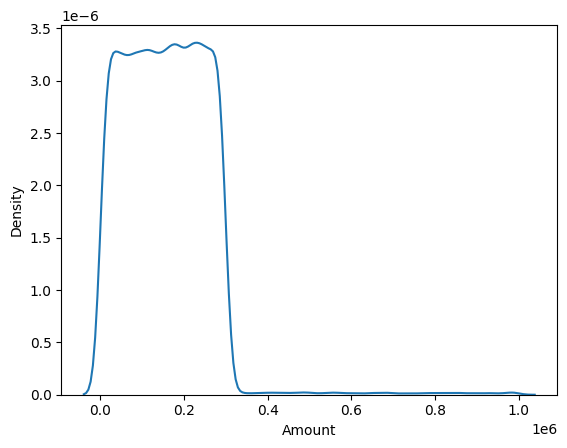

In [25]:
sns.kdeplot(credit['Amount'])
plt.show()

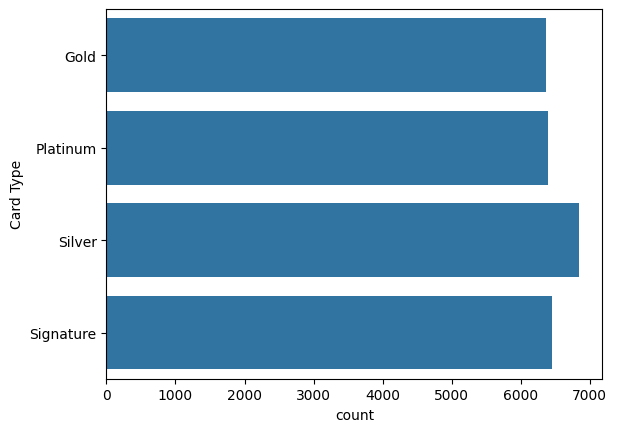

In [31]:
sns.countplot(credit['Card Type'])
plt.show()

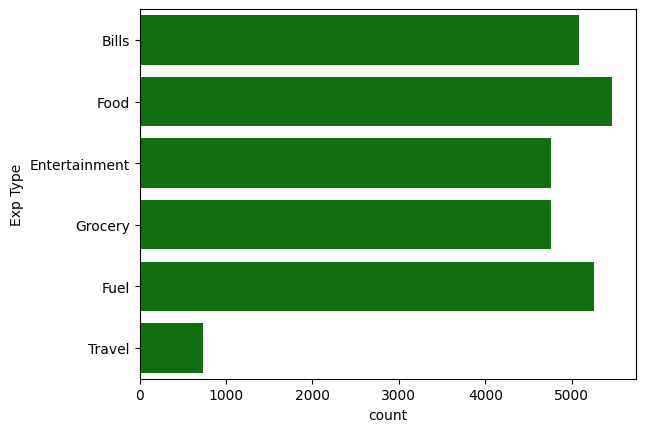

In [38]:
sns.countplot(credit['Exp Type'],color='green')
plt.show()